In [4]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [1]:
from GLM_regression import *

filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=5)
    

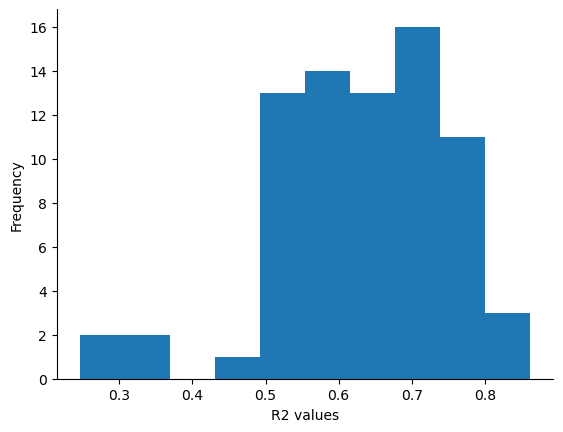

In [2]:

all_R2_values = []
for animal in GLM_params:
    for neuron in GLM_params[animal]:
        all_R2_values.append(GLM_params[animal][neuron]['R2'])
all_R2_values = np.array(all_R2_values)
plt.hist(all_R2_values.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.show()



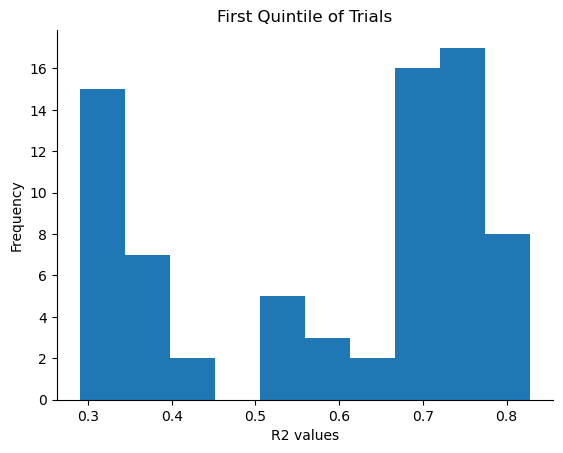

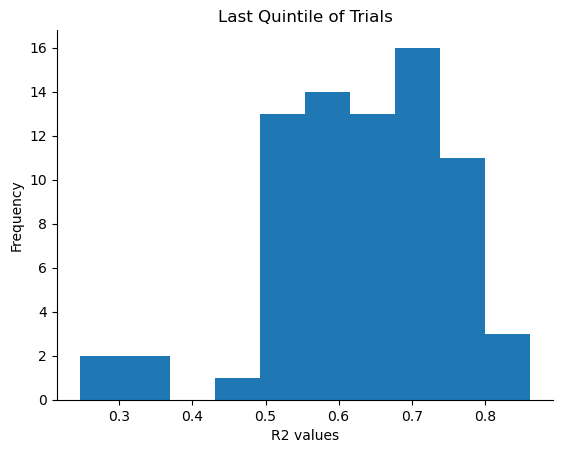

all_R2_values_last quintile maximum 0.8621664887005728
all_R2_values_first quintile minimum 0.8285971339973998
(75,)
The maximum R² value is 0.8621664887005728 at index 63.


In [1]:
from GLM_regression import *

filepath = "SSTindivsomata_GLM.mat"

reorganized_data, variable_list = load_data(filepath)

GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)

all_R2_values_first = []
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        all_R2_values_first.append(GLM_params_first_quintile[animal][neuron]['R2'])
all_R2_values_first = np.array(all_R2_values_first)

plt.hist(all_R2_values_first.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()

GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5)

all_R2_values_last = []
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        all_R2_values_last.append(GLM_params_last_quintile[animal][neuron]['R2'])
all_R2_values_last = np.array(all_R2_values_last)

plt.hist(all_R2_values_last.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()

print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first)}")

print(all_R2_values_last.shape)

max_value = np.max(all_R2_values_last)

max_index = np.where(all_R2_values_last == max_value)[0][0]

print(f"The maximum R² value is {max_value} at index {max_index}.")

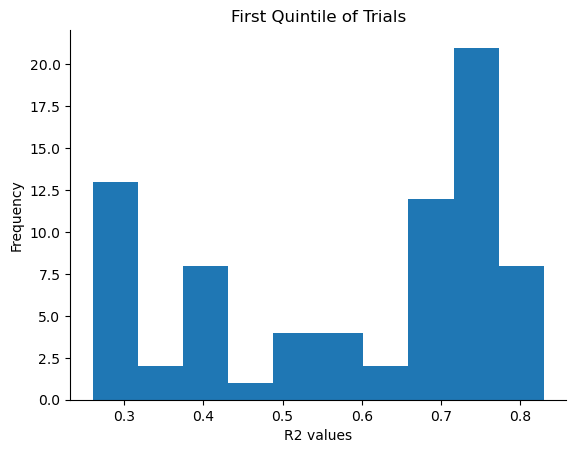

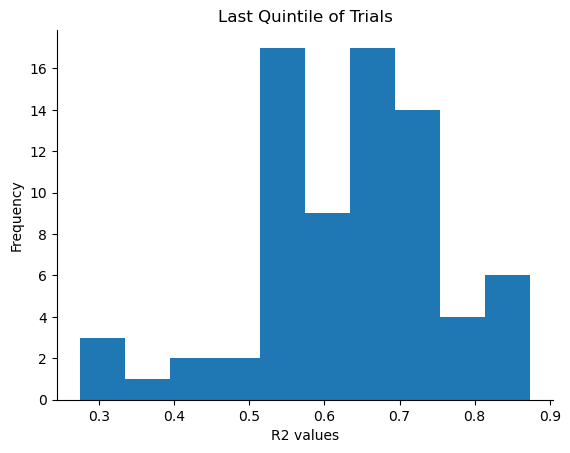

all_R2_values_last quintile maximum 0.8743363059199747
all_R2_values_first quintile minimum 0.829815132017199
The maximum R² value is 0.8743363059199747 at index 62.


In [1]:
############################### testing out lasso ###########################33

from GLM_regression import *

# Load data
filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Fit GLM with Lasso regression for the first quintile
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1, regression='lasso')

# Collect R² values for the first quintile
all_R2_values_first = []
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        all_R2_values_first.append(GLM_params_first_quintile[animal][neuron]['R2'])
all_R2_values_first = np.array(all_R2_values_first)

# Plot histogram of R² values for the first quintile
plt.hist(all_R2_values_first.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()

# Fit GLM with Lasso regression for the last quintile
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5, regression='lasso')

# Collect R² values for the last quintile
all_R2_values_last = []
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        all_R2_values_last.append(GLM_params_last_quintile[animal][neuron]['R2'])
all_R2_values_last = np.array(all_R2_values_last)

# Plot histogram of R² values for the last quintile
plt.hist(all_R2_values_last.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()

# Print the maximum R² values for the last and first quintiles
print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first)}")

# Find and print the index of the maximum R² value in the last quintile
max_value = np.max(all_R2_values_last)
max_index = np.where(all_R2_values_last == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")


NaN values found in example_data before normalization.
NaN values found in example_data after normalization.


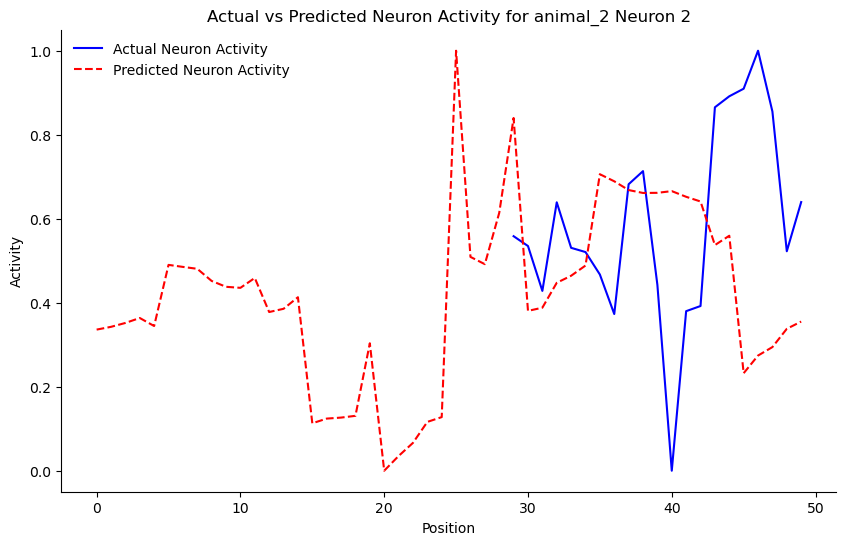

In [6]:
quintile = 1

GLM_params_quintile = fit_GLM(reorganized_data, quintile=quintile)

example_neuron = 2  
example_animal = 'animal_2'  


example_trial_number = 1  
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial_number]


if np.isnan(example_data).any():
    print("NaN values found in example_data before normalization.")
else:
    print("No NaN values in example_data before normalization.")
    
# normalization
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))


if np.isnan(example_data).any():
    print("NaN values found in example_data after normalization.")
else:
    print("No NaN values in example_data after normalization.")

    

example_neuron_activity = example_data[:, 0]  # Neuron activity
example_variables = example_data[:, 1:]       # Other variables

# remove any rows with NaN values in example_variables
nan_mask = ~np.isnan(example_variables).any(axis=1)
example_neuron_activity = example_neuron_activity[nan_mask]
example_variables = example_variables[nan_mask]
    
glm_model = GLM_params_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

#normalize the glm data so that it looks similar to actual data
predicted_activity_normalized = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))



fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(example_neuron_activity, label='Actual Neuron Activity', color='blue')
ax.plot(predicted_activity_normalized, label='Predicted Neuron Activity', color='red', linestyle='--')
ax.set_title(f'Actual vs Predicted Neuron Activity for {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()


NaN values found in example_data before normalization.
NaN values found in example_data after normalization.
Number of NaNs in example_neuron_activity before filtering: 7
Number of data points remaining after filtering: 50
Filtered example_neuron_activity:
[       nan        nan        nan        nan        nan        nan
        nan 0.28192179 0.35002131 0.70067302 0.87912572 0.49790363
 0.70977681 1.         0.59674968 0.69131583 0.81785404 0.84591185
 0.6448     0.51470403 0.28922757 0.22045574 0.32760327 0.26509145
 0.3319323  0.5830794  0.9350251  0.76143124 0.66539531 0.80763133
 0.62769402 0.49089873 0.43638183 0.26408186 0.5656542  0.39412521
 0.1492556  0.12072045 0.12803904 0.01784398 0.06739961 0.23468986
 0.34624233 0.26322436 0.23278323 0.         0.16410084 0.11438451
 0.24224927 0.16766165]
Filtered example_variables:
[[0.         0.         0.21889715 0.         0.         0.
  0.         1.        ]
 [0.         0.         0.40005397 0.         0.         0.
  0.      

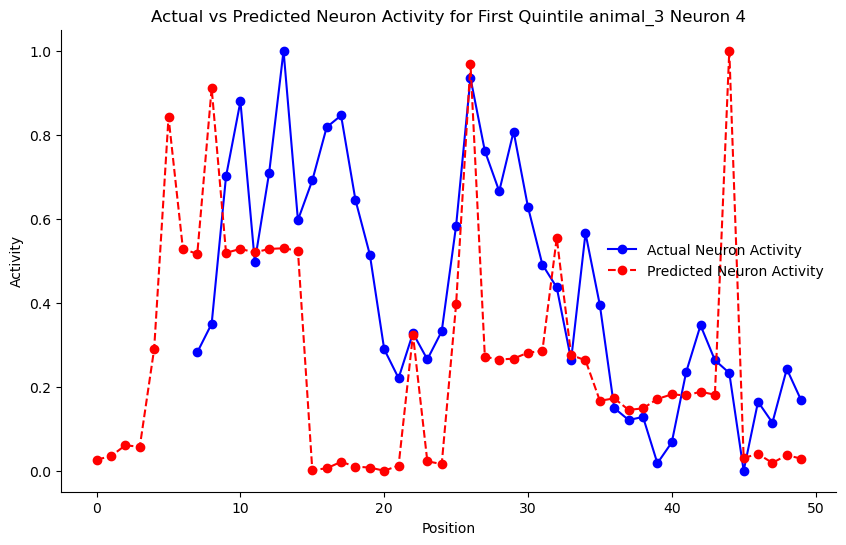

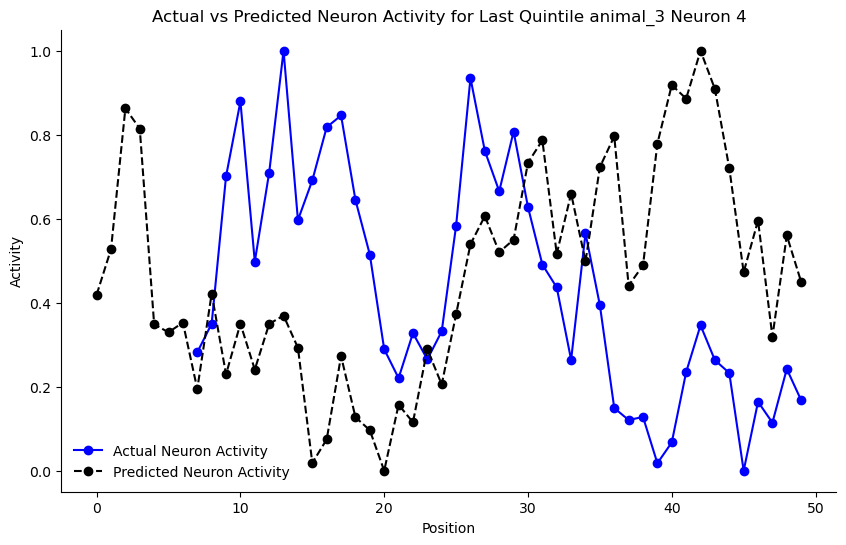

In [14]:
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)

GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=5)

example_neuron = 4  
example_animal = 'animal_3'  

example_trial_number = 1  
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial_number]

# Check for NaNs before normalization
if np.isnan(example_data).any():
    print("NaN values found in example_data before normalization.")
else:
    print("No NaN values in example_data before normalization.")
    
# Normalization
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))

# Check for NaNs after normalization
if np.isnan(example_data).any():
    print("NaN values found in example_data after normalization.")
else:
    print("No NaN values in example_data after normalization.")

# Split the data
example_neuron_activity = example_data[:, 0]  # Neuron activity
example_variables = example_data[:, 1:]       # Other variables

# Check the number of NaNs in example_neuron_activity before filtering
nan_count_neuron_activity = np.isnan(example_neuron_activity).sum()
print(f"Number of NaNs in example_neuron_activity before filtering: {nan_count_neuron_activity}")

# Apply nan_mask to remove rows with NaNs in example_variables
nan_mask = ~np.isnan(example_variables).any(axis=1)
example_neuron_activity = example_neuron_activity[nan_mask]
example_variables = example_variables[nan_mask]

# Check the number of data points remaining after filtering
print(f"Number of data points remaining after filtering: {len(example_neuron_activity)}")

# Use the GLM model for prediction
glm_model = GLM_params_first_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

# Normalize the predicted activity
predicted_activity_normalized = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

# Print the filtered data for inspection
print("Filtered example_neuron_activity:")
print(example_neuron_activity)
print("Filtered example_variables:")
print(example_variables)

# Plot the actual vs predicted neuron activity as points to visualize all data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(example_neuron_activity)), example_neuron_activity, 'bo-', label='Actual Neuron Activity')
ax.plot(range(len(predicted_activity_normalized)), predicted_activity_normalized, 'ro--', label='Predicted Neuron Activity')
ax.set_title(f'Actual vs Predicted Neuron Activity for First Quintile {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()



glm_model = GLM_params_last_quintile[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)

# Normalize the predicted activity
predicted_activity_normalized_last = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))

# # Print the filtered data for inspection
# print("Filtered example_neuron_activity:")
# print(example_neuron_activity)
# print("Filtered example_variables:")
# print(example_variables)

# Plot the actual vs predicted neuron activity as points to visualize all data points
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(example_neuron_activity)), example_neuron_activity, 'bo-', label='Actual Neuron Activity')
ax.plot(range(len(predicted_activity_normalized_last)), predicted_activity_normalized_last, 'ko--', label='Predicted Neuron Activity')
ax.set_title(f'Actual vs Predicted Neuron Activity for Last Quintile {example_animal} Neuron {example_neuron}')
ax.set_xlabel('Position')
ax.set_ylabel('Activity')
ax.legend()
plt.show()

len R2_values_first_quintile 75
mean R2_values_first_quintile 0.5849980852375269
max R2_values_first_quintile 0.8285971339973998
len R2_values_last_quintile 75
 mean R2_values_last_quintile 0.561177153197406
 max R2_values_last_quintile 0.899186958112499


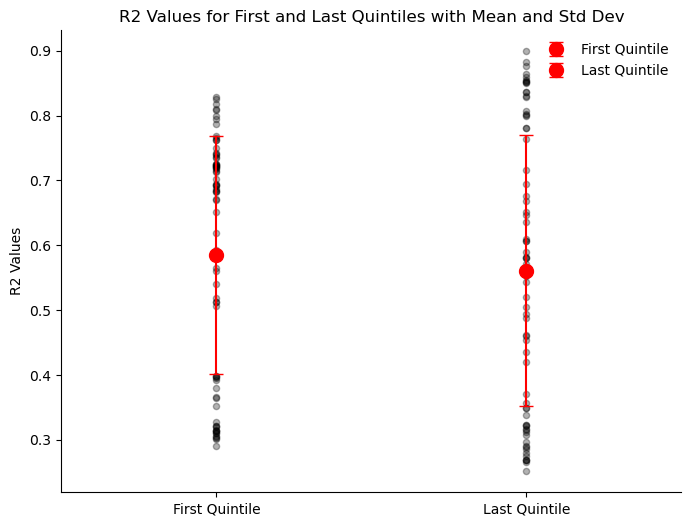

In [39]:
R2_values_first_quintile_history = []
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1)
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        R2_values_first_quintile = GLM_params_first_quintile[animal][neuron]['R2']
        R2_values_first_quintile_history.append(R2_values_first_quintile.copy())
print(f"len R2_values_first_quintile {len(R2_values_first_quintile_history)}")
print(f"mean R2_values_first_quintile {np.mean(R2_values_first_quintile_history)}")
print(f"max R2_values_first_quintile {np.max(R2_values_first_quintile_history)}")

        
R2_values_last_quintile_history = []
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=2)
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        R2_values_last_quintile = GLM_params_last_quintile[animal][neuron]['R2']
        R2_values_last_quintile_history.append(R2_values_last_quintile)
print(f"len R2_values_last_quintile {len(R2_values_last_quintile_history)}")
print(f" mean R2_values_last_quintile {np.mean(R2_values_last_quintile_history)}")
print(f" max R2_values_last_quintile {np.max(R2_values_last_quintile_history)}")

# Plot individual data points for the first quintile
plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(R2_values_first_quintile_history, 1), R2_values_first_quintile_history, color='black', alpha=0.3, s=20)

# Plot individual data points for the last quintile
plt.scatter(np.full_like(R2_values_last_quintile_history, 2), R2_values_last_quintile_history, color='black', alpha=0.3, s=20)

# Calculate means and standard deviations
mean_first_quintile = np.mean(R2_values_first_quintile_history)
std_first_quintile = np.std(R2_values_first_quintile_history)

mean_last_quintile = np.mean(R2_values_last_quintile_history)
std_last_quintile = np.std(R2_values_last_quintile_history)

# Plot the means and error bars
plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')

# Customize the plot
plt.xticks([1, 2], ['First Quintile', 'Last Quintile'])
plt.ylabel('R2 Values')
plt.title('R2 Values for First and Last Quintiles with Mean and Std Dev')
plt.xlim(0.5, 2.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

    
# R2_values = [GLM_params_first_quintile[example_animal][i]['R2'] for i in GLM_params[example_animal]]
# example_neuron = np.argmax(R2_values)

# R2 = GLM_params[example_animal][example_neuron]['R2']

len R2_values_first_quintile 75
mean R2_values_first_quintile 0.5842261299811976
max R2_values_first_quintile 0.829815132017199
len R2_values_last_quintile 75
 mean R2_values_last_quintile 0.5741514151690427
 max R2_values_last_quintile 0.8790327359752077


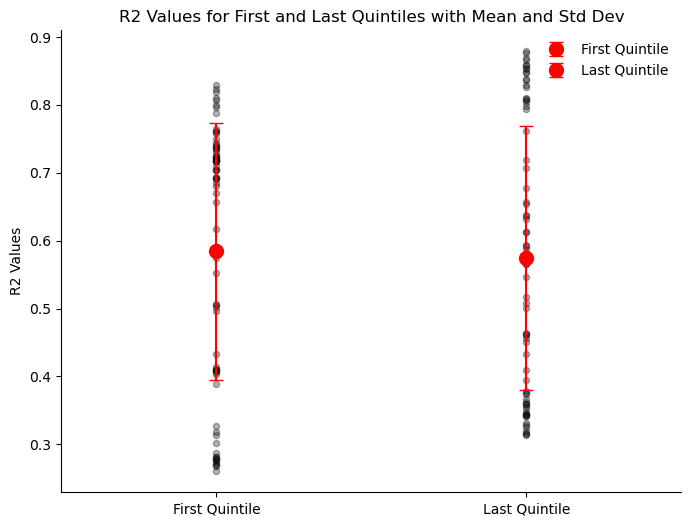

In [2]:
########################### testing out lasso ##################

R2_values_first_quintile_history = []
GLM_params_first_quintile = fit_GLM(reorganized_data, quintile=1, regression='lasso')
for animal in GLM_params_first_quintile:
    for neuron in GLM_params_first_quintile[animal]:
        R2_values_first_quintile = GLM_params_first_quintile[animal][neuron]['R2']
        R2_values_first_quintile_history.append(R2_values_first_quintile.copy())
print(f"len R2_values_first_quintile {len(R2_values_first_quintile_history)}")
print(f"mean R2_values_first_quintile {np.mean(R2_values_first_quintile_history)}")
print(f"max R2_values_first_quintile {np.max(R2_values_first_quintile_history)}")

        
R2_values_last_quintile_history = []
GLM_params_last_quintile = fit_GLM(reorganized_data, quintile=2, regression='lasso')
for animal in GLM_params_last_quintile:
    for neuron in GLM_params_last_quintile[animal]:
        R2_values_last_quintile = GLM_params_last_quintile[animal][neuron]['R2']
        R2_values_last_quintile_history.append(R2_values_last_quintile)
print(f"len R2_values_last_quintile {len(R2_values_last_quintile_history)}")
print(f" mean R2_values_last_quintile {np.mean(R2_values_last_quintile_history)}")
print(f" max R2_values_last_quintile {np.max(R2_values_last_quintile_history)}")

# Plot individual data points for the first quintile
plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(R2_values_first_quintile_history, 1), R2_values_first_quintile_history, color='black', alpha=0.3, s=20)

# Plot individual data points for the last quintile
plt.scatter(np.full_like(R2_values_last_quintile_history, 2), R2_values_last_quintile_history, color='black', alpha=0.3, s=20)

# Calculate means and standard deviations
mean_first_quintile = np.mean(R2_values_first_quintile_history)
std_first_quintile = np.std(R2_values_first_quintile_history)

mean_last_quintile = np.mean(R2_values_last_quintile_history)
std_last_quintile = np.std(R2_values_last_quintile_history)

# Plot the means and error bars
plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')

# Customize the plot
plt.xticks([1, 2], ['First Quintile', 'Last Quintile'])
plt.ylabel('R2 Values')
plt.title('R2 Values for First and Last Quintiles with Mean and Std Dev')
plt.xlim(0.5, 2.5)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
num_animals_GLM_first_quintile = fit_GLM(reorganized_data, quintile=1)
print(f"num_animals_GLM_first_quintile {num_animals_GLM_first_quintile}")
num_neurons = num_animals_GLM_first_quintile[animal]

In [29]:
total_neurons = 0

# Iterate over each animal in GLM_params_first_quintile
for animal in GLM_params_first_quintile:
    # Get the number of neurons for the current animal
    num_neurons = len(GLM_params_first_quintile[animal])
    
    # Add to the total count of neurons
    total_neurons += num_neurons

print(f"Total number of neurons across all animals: {total_neurons}")



Total number of neurons across all animals: 75


In [23]:
animal_idx = 2  
neuron_idx = 1 

# Construct the correct dictionary key for the specific animal
animal_key = f'animal_{animal_idx + 1}'  # Adjust for 0-based indexing in Python

# Check if the animal key exists in reorganized_data
if animal_key in reorganized_data:
    # Check if the neuron index is within the range for the specific animal
    if neuron_idx < len(reorganized_data[animal_key]):
        neuron = reorganized_data[animal_key][neuron_idx]
        num_trials = neuron.shape[2]  # Number of trials for the specific neuron
        quintile_size = num_trials // 5  # Size of each quintile

        print(f"Animal: {animal_key}, Neuron Index: {neuron_idx}")
        print(f"Number of Trials: {num_trials}")
        print(f"Quintile Size: {quintile_size}")
    else:
        print(f"Neuron index {neuron_idx} is out of range for {animal_key}.")
else:
    print(f"{animal_key} not found in reorganized_data.")


Animal: animal_3, Neuron Index: 1
Number of Trials: 83
Quintile Size: 16


In [7]:
animal_idx = 2  # Index for the specific animal (assuming 0-based index)
neuron_idx = 1  # Index for the specific neuron (assuming 0-based index)


animal_key = f'animal_{animal_idx + 1}'  # Adjust for 0-based indexing in Python

# Check if the animal key exists in reorganized_data
if animal_key in reorganized_data:
    # Check if the neuron index is within the range for the specific animal
    if neuron_idx < len(reorganized_data[animal_key]):
        neuron = reorganized_data[animal_key][neuron_idx]
#         num_trials = neuron.shape[2]  # Number of trials for the specific neuron
        num_trials = 104
        
        # Calculate the quintile indices
        quintile_indices = [(i * num_trials) // 5 for i in range(6)]  # This will give you the start indices for each quintile
        
        quintiles = []
        for i in range(5):
            start_idx = quintile_indices[i]
            end_idx = quintile_indices[i + 1]
            quintile_size = end_idx - start_idx
            quintiles.append((start_idx, end_idx, quintile_size))
        
        # Print out the calculated quintile sizes
        print(f"Animal: {animal_key}, Neuron Index: {neuron_idx}")
        print(f"Number of Trials: {num_trials}")
        for i, (start_idx, end_idx, quintile_size) in enumerate(quintiles):
            print(f"Quintile {i + 1}: Start Index = {start_idx}, End Index = {end_idx}, Size = {quintile_size}")
        
    else:
        print(f"Neuron index {neuron_idx} is out of range for {animal_key}.")
else:
    print(f"{animal_key} not found in reorganized_data.")


Animal: animal_3, Neuron Index: 1
Number of Trials: 104
Quintile 1: Start Index = 0, End Index = 20, Size = 20
Quintile 2: Start Index = 20, End Index = 41, Size = 21
Quintile 3: Start Index = 41, End Index = 62, Size = 21
Quintile 4: Start Index = 62, End Index = 83, Size = 21
Quintile 5: Start Index = 83, End Index = 104, Size = 21


R2: 0.8053189988819718
alpha: 1.0


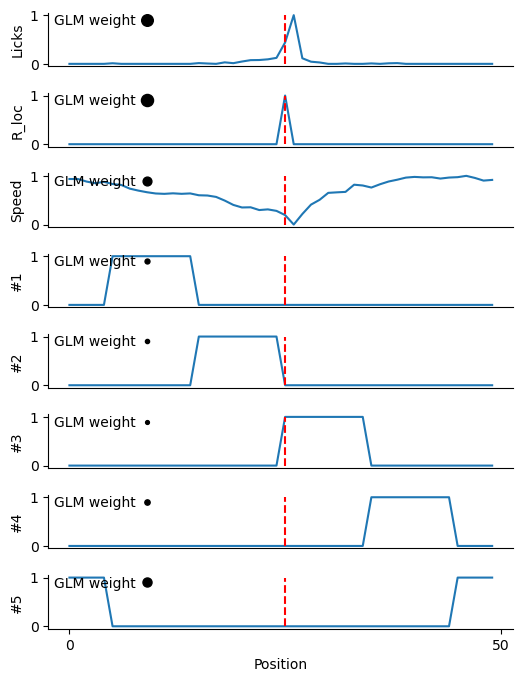

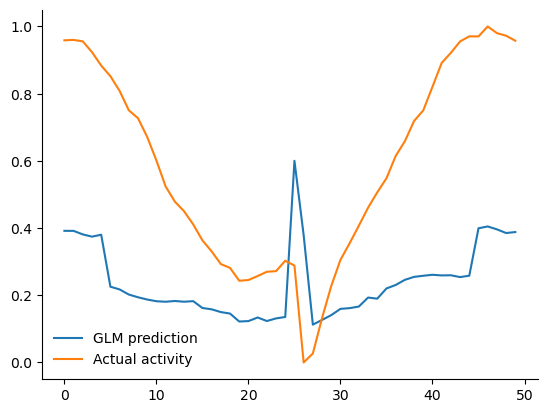

In [9]:
example_animal = 'animal_6'
example_trial = 4
# example_neuron = 1
R2_values = [GLM_params[example_animal][i]['R2'] for i in GLM_params[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params[example_animal][example_neuron]['R2']

example_data = np.nanmean(reorganized_data[example_animal][example_neuron][:,:,1:], axis=2)
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
example_neuron_activity = example_data[:, 0]
example_variables = example_data[:, 1:]

# example_data = reorganized_data[example_animal][example_neuron][:,:,1:]
# example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
# example_neuron_activity = example_data[:, 0, example_trial]
# example_variables = example_data[:, 1:, example_trial]


fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, 
                wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables[:, i])
    ax.set_ylabel(variable_list[i+1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0,50])
    else:
        ax.set_xticks([])

    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9],[0.9], c='k', s=GLM_params[example_animal][example_neuron]["weights"][i]*200)


# Plot prediction vs actual neuron activity
glm_model = GLM_params[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)
pred_norm = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
actual_norm = (example_neuron_activity - np.min(example_neuron_activity)) / (np.max(example_neuron_activity) - np.min(example_neuron_activity))

print("R2:", GLM_params[example_animal][example_neuron]['R2'])
print("alpha:", GLM_params[example_animal][example_neuron]['alpha'])

plt.figure()
plt.plot(predicted_activity, label='GLM prediction')
plt.plot(example_neuron_activity, label='Actual activity')

# plt.plot(pred_norm, label='GLM prediction', c='gray', linestyle='--')
# plt.plot(actual_norm, label='Actual activity', c='k')
plt.legend()


<BarContainer object of 8 artists>

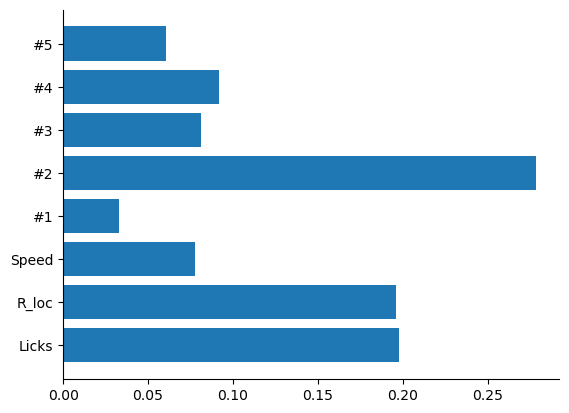

In [367]:
neuron_nr = 2

# Bar graph
plt.barh(variable_list[1:], GLM_params['animal_1'][neuron_nr]['weights'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.636e+01, tolerance: 1.575e-01
  model = cd_fast.enet_coordinate_descent(


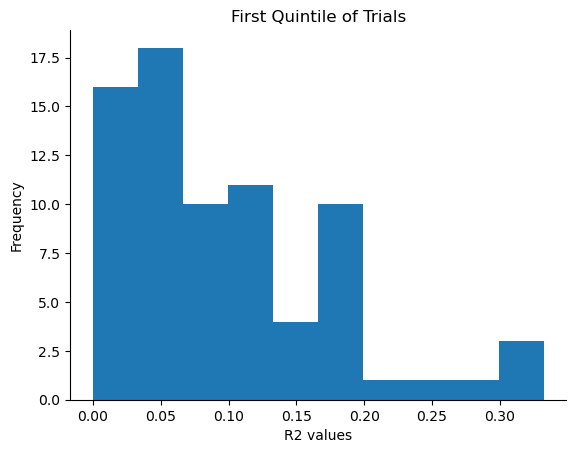

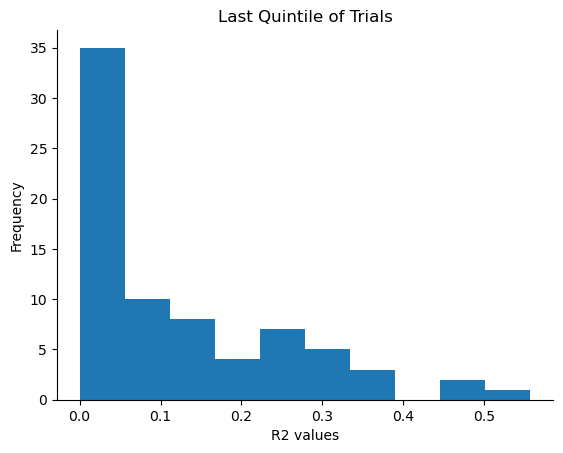

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+02, tolerance: 7.673e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+01, tolerance: 8.175e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.975e+01, toleranc

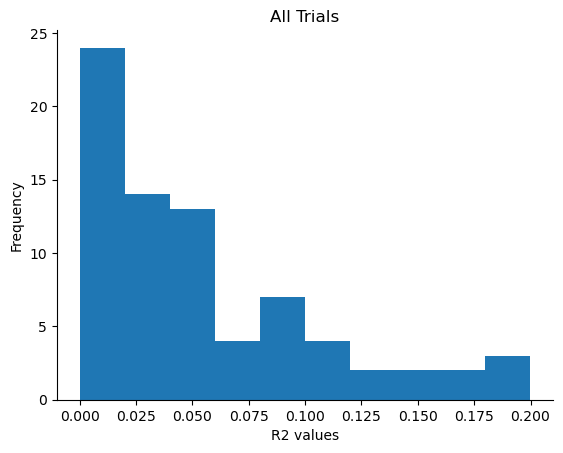

all_R2_values_last quintile maximum 0.5571772861844826
all_R2_values_first quintile minimum 0.33230335456161064
The maximum R² value is 0.5571772861844826 at index 58.
all_R2_values_last quintile mean 0.12856764898173753
all_R2_values_first quintile mean 0.09513305470534124


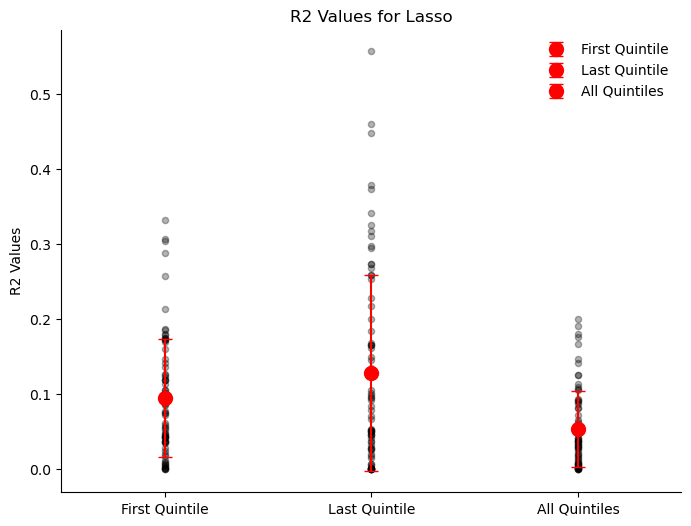

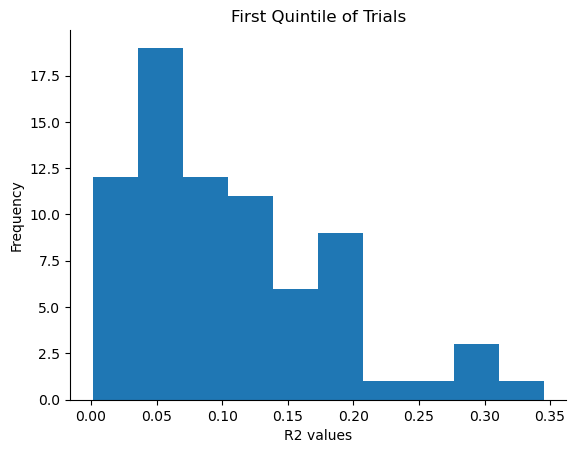

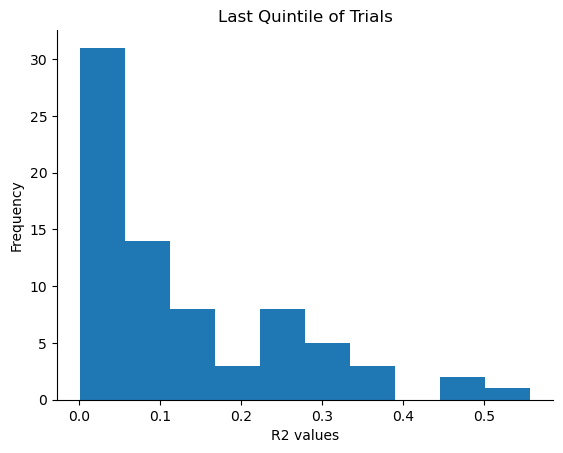

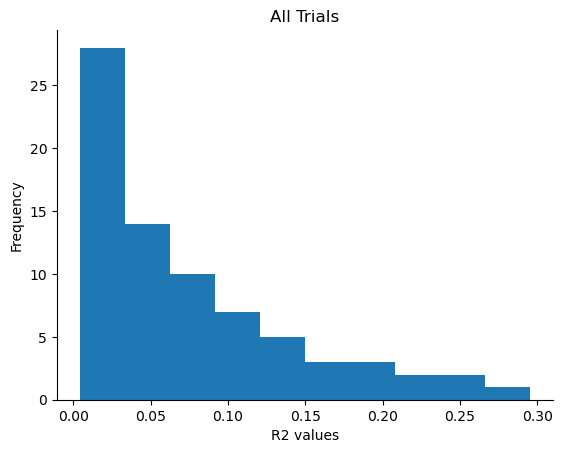

all_R2_values_last quintile maximum 0.5571791063532394
all_R2_values_first quintile minimum 0.3451501481100382
The maximum R² value is 0.5571791063532394 at index 58.
all_R2_values_last quintile mean 0.13521241865662414
all_R2_values_first quintile mean 0.10283955135429454


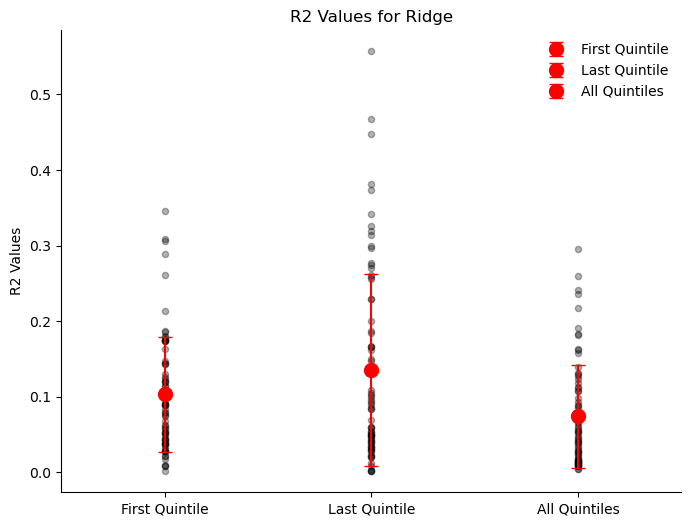

In [1]:
############################### testing out lasso ###########################33

from GLM_regression import *


filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)


GLM_params_first_quintile_new = fit_GLM(reorganized_data, quintile=1, regression='lasso')


all_R2_values_first_new = []
for animal in GLM_params_first_quintile_new:
    for neuron in GLM_params_first_quintile_new[animal]:
        all_R2_values_first_new.append(GLM_params_first_quintile_new[animal][neuron]['R2'])
all_R2_values_first_new = np.array(all_R2_values_first_new)


plt.hist(all_R2_values_first_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()


GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='lasso')


all_R2_values_last_new = []
for animal in GLM_params_last_quintile_new:
    for neuron in GLM_params_last_quintile_new[animal]:
        all_R2_values_last_new.append(GLM_params_last_quintile_new[animal][neuron]['R2'])
all_R2_values_last_new = np.array(all_R2_values_last_new)



plt.hist(all_R2_values_last_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()


GLM_params_all_quintile_new = fit_GLM(reorganized_data, quintile=None, regression='lasso')

all_R2_values_all_new = []
for animal in GLM_params_all_quintile_new:
    for neuron in GLM_params_all_quintile_new[animal]:
        all_R2_values_all_new.append(GLM_params_all_quintile_new[animal][neuron]['R2'])
all_R2_values_all_new = np.array(all_R2_values_all_new)



plt.hist(all_R2_values_all_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("All Trials")
plt.show()


print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first_new)}")


max_value = np.max(all_R2_values_last_new)
max_index = np.where(all_R2_values_last_new == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")
print(f"all_R2_values_last quintile mean {np.mean(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile mean {np.mean(all_R2_values_first_new)}")


plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(all_R2_values_first_new, 1), all_R2_values_first_new, color='black', alpha=0.3, s=20)

plt.scatter(np.full_like(all_R2_values_last_new, 2), all_R2_values_last_new, color='black', alpha=0.3, s=20)


plt.scatter(np.full_like(all_R2_values_all_new, 3), all_R2_values_all_new, color='black', alpha=0.3, s=20)


mean_first_quintile = np.mean(all_R2_values_first_new)
std_first_quintile = np.std(all_R2_values_first_new)

mean_last_quintile = np.mean(all_R2_values_last_new)
std_last_quintile = np.std(all_R2_values_last_new)

mean_all_quintile = np.mean(all_R2_values_all_new)
std_all_quintile = np.std(all_R2_values_all_new)


plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')
plt.errorbar(3, mean_all_quintile, yerr=std_all_quintile, fmt='o', color='red', markersize=10, capsize=5, label='All Quintiles')


plt.xticks([1, 2, 3], ['First Quintile', 'Last Quintile', 'All Quintiles'])
plt.ylabel('R2 Values')
plt.title('R2 Values for Lasso')
plt.xlim(0.5, 3.5)

plt.legend()
plt.show()



############################### testing out ridge ###########################


GLM_params_first_quintile_new = fit_GLM(reorganized_data, quintile=1, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])


all_R2_values_first_new = []
for animal in GLM_params_first_quintile_new:
    for neuron in GLM_params_first_quintile_new[animal]:
        all_R2_values_first_new.append(GLM_params_first_quintile_new[animal][neuron]['R2'])
all_R2_values_first_new = np.array(all_R2_values_first_new)


plt.hist(all_R2_values_first_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("First Quintile of Trials")
plt.show()


GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])


all_R2_values_last_new = []
for animal in GLM_params_last_quintile_new:
    for neuron in GLM_params_last_quintile_new[animal]:
        all_R2_values_last_new.append(GLM_params_last_quintile_new[animal][neuron]['R2'])
all_R2_values_last_new = np.array(all_R2_values_last_new)



plt.hist(all_R2_values_last_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("Last Quintile of Trials")
plt.show()


GLM_params_all_quintile_new = fit_GLM(reorganized_data, quintile=None, regression='ridge', alphas=[0.1, 1, 10, 100, 1000])

all_R2_values_all_new = []
for animal in GLM_params_all_quintile_new:
    for neuron in GLM_params_all_quintile_new[animal]:
        all_R2_values_all_new.append(GLM_params_all_quintile_new[animal][neuron]['R2'])
all_R2_values_all_new = np.array(all_R2_values_all_new)



plt.hist(all_R2_values_all_new.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.title("All Trials")
plt.show()


print(f"all_R2_values_last quintile maximum {np.max(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile minimum {np.max(all_R2_values_first_new)}")


max_value = np.max(all_R2_values_last_new)
max_index = np.where(all_R2_values_last_new == max_value)[0][0]
print(f"The maximum R² value is {max_value} at index {max_index}.")
print(f"all_R2_values_last quintile mean {np.mean(all_R2_values_last_new)}")
print(f"all_R2_values_first quintile mean {np.mean(all_R2_values_first_new)}")


plt.figure(figsize=(8, 6))
plt.scatter(np.full_like(all_R2_values_first_new, 1), all_R2_values_first_new, color='black', alpha=0.3, s=20)

plt.scatter(np.full_like(all_R2_values_last_new, 2), all_R2_values_last_new, color='black', alpha=0.3, s=20)


plt.scatter(np.full_like(all_R2_values_all_new, 3), all_R2_values_all_new, color='black', alpha=0.3, s=20)


mean_first_quintile = np.mean(all_R2_values_first_new)
std_first_quintile = np.std(all_R2_values_first_new)

mean_last_quintile = np.mean(all_R2_values_last_new)
std_last_quintile = np.std(all_R2_values_last_new)

mean_all_quintile = np.mean(all_R2_values_all_new)
std_all_quintile = np.std(all_R2_values_all_new)


plt.errorbar(1, mean_first_quintile, yerr=std_first_quintile, fmt='o', color='red', markersize=10, capsize=5, label='First Quintile')
plt.errorbar(2, mean_last_quintile, yerr=std_last_quintile, fmt='o', color='red', markersize=10, capsize=5, label='Last Quintile')
plt.errorbar(3, mean_all_quintile, yerr=std_all_quintile, fmt='o', color='red', markersize=10, capsize=5, label='All Quintiles')


plt.xticks([1, 2, 3], ['First Quintile', 'Last Quintile', 'All Quintiles'])
plt.ylabel('R2 Values')
plt.title('R2 Values for Ridge')
plt.xlim(0.5, 3.5)

plt.legend()
plt.show()



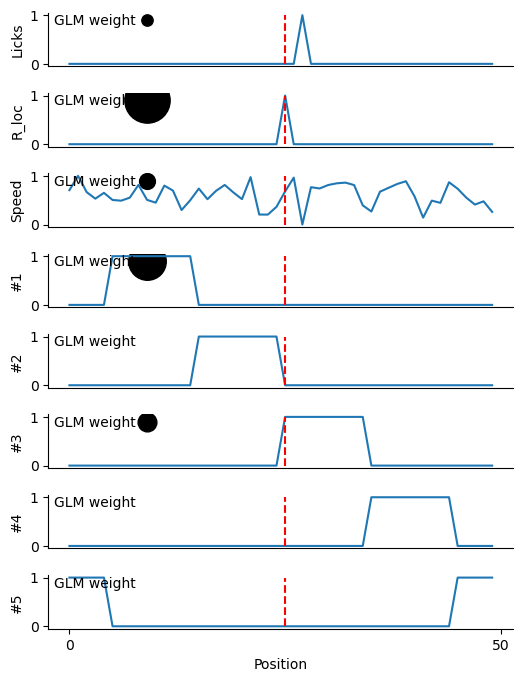

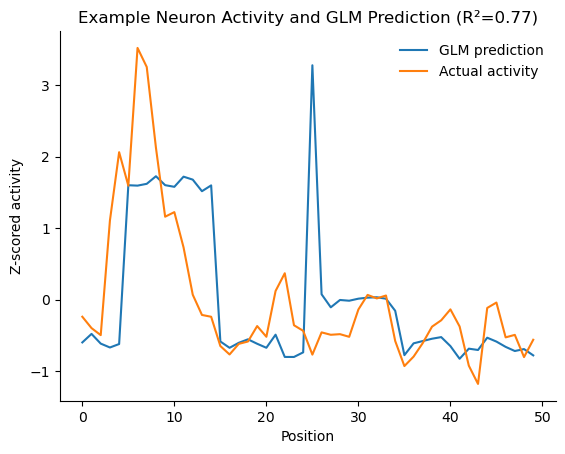

In [5]:
####### lasso #######

from GLM_regression_MF import *

filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Z-score function
def z_score(data):
    return (data - np.mean(data)) / np.std(data)

# Fit the GLM for the last quintile
GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='lasso')

example_animal = 'animal_6'
example_trial = 4

R2_values = [GLM_params_last_quintile_new[example_animal][i]['R2'] for i in GLM_params_last_quintile_new[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params_last_quintile_new[example_animal][example_neuron]['R2']


example_data = reorganized_data[example_animal][example_neuron][:,:,example_trial]
example_neuron_activity = example_data[:, 0]
example_neuron_activity_zscored = z_score(example_neuron_activity)
example_variables = example_data[:, 1:]
example_variables_normalized = (example_variables - np.min(example_variables, axis=0)) / (np.max(example_variables, axis=0) - np.min(example_variables, axis=0))

# Plot the variables with their GLM weights
fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables_normalized[:, i])
    ax.set_ylabel(variable_list[i+1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0,50])
    else:
        ax.set_xticks([])

    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9],[0.9], c='k', s=GLM_params_last_quintile_new[example_animal][example_neuron]["weights"][i]*200)

# Plot prediction vs actual neuron activity
glm_model = GLM_params_last_quintile_new[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables_normalized)
pred_norm = z_score(predicted_activity)
actual_norm = example_neuron_activity_zscored

plt.figure()
plt.plot(pred_norm, label='GLM prediction')
plt.plot(actual_norm, label='Actual activity')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Z-scored activity')
plt.title(f'Example Neuron Activity and GLM Prediction (R²={R2:.2f})')
plt.show()


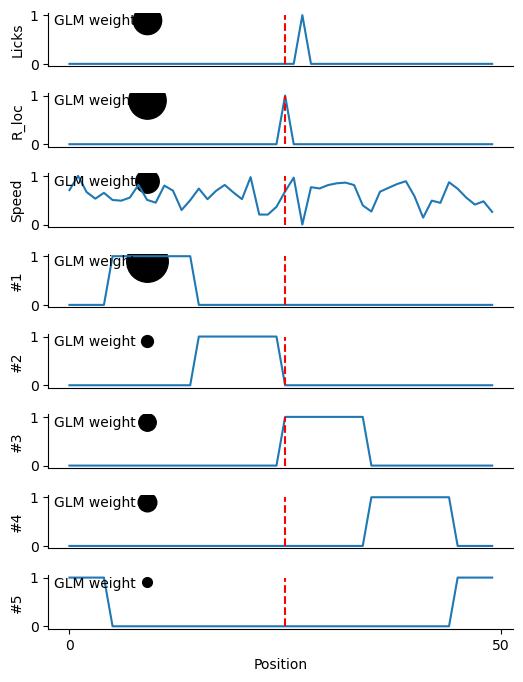

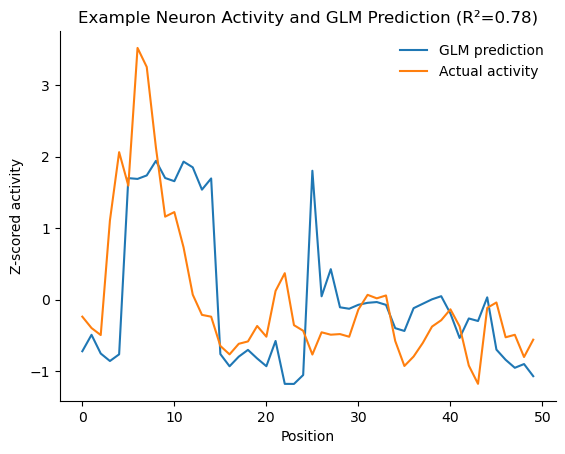

In [16]:
from GLM_regression_MF import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

filepath = "SSTindivsomata_GLM.mat"
reorganized_data, variable_list = load_data(filepath)

# Z-score function
def z_score(data):
    return (data - np.nanmean(data)) / np.nanstd(data)

# Fit the GLM for the last quintile
GLM_params_last_quintile_new = fit_GLM(reorganized_data, quintile=5, regression='ridge', alphas=[0.1, 1, 10, 100, 1000, 10000])

example_animal = 'animal_6'
example_trial = 4

R2_values = [GLM_params_last_quintile_new[example_animal][i]['R2'] for i in GLM_params_last_quintile_new[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params_last_quintile_new[example_animal][example_neuron]['R2']

# Extract and normalize data
example_data = reorganized_data[example_animal][example_neuron][:, :, example_trial]
example_neuron_activity = example_data[:, 0]
example_neuron_activity_zscored = z_score(example_neuron_activity)
example_variables = example_data[:, 1:]

# Handle NaNs and empty arrays
example_variables = np.nan_to_num(example_variables, nan=0.0)

# Normalize variables
min_vals = np.nanmin(example_variables, axis=0)
max_vals = np.nanmax(example_variables, axis=0)

# Ensure there is a difference to avoid division by zero
range_vals = np.where(max_vals - min_vals == 0, 1, max_vals - min_vals)
example_variables_normalized = (example_variables - min_vals) / range_vals

# Plot the variables with their GLM weights
fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables_normalized[:, i])
    ax.set_ylabel(variable_list[i + 1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0, 50])
    else:
        ax.set_xticks([])

    weight = GLM_params_last_quintile_new[example_animal][example_neuron]["weights"][i]
    if np.isnan(weight) or np.isinf(weight):
        weight = 0  # Handle NaN or infinite weights safely
    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9], [0.9], c='k', s=np.abs(weight) * 200)

# Plot prediction vs actual neuron activity
glm_model = GLM_params_last_quintile_new[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables_normalized)
pred_norm = z_score(predicted_activity)
actual_norm = example_neuron_activity_zscored

plt.figure()
plt.plot(pred_norm, label='GLM prediction')
plt.plot(actual_norm, label='Actual activity')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Z-scored activity')
plt.title(f'Example Neuron Activity and GLM Prediction (R²={R2:.2f})')
plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+01, tolerance: 3.900e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.307e+01, tolerance: 3.900e-01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+01, toleranc

Best neuron: 31
R2: 0.09263517882397265
alpha: 0.0033194209255247003
pearson R2 overall: 0.09306171830284933
pearson R2 average: 0.9075296778122309


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


FileNotFoundError: [Errno 2] No such file or directory: 'figures/GLM_regression_EC_GLM_animal_2_31.png'

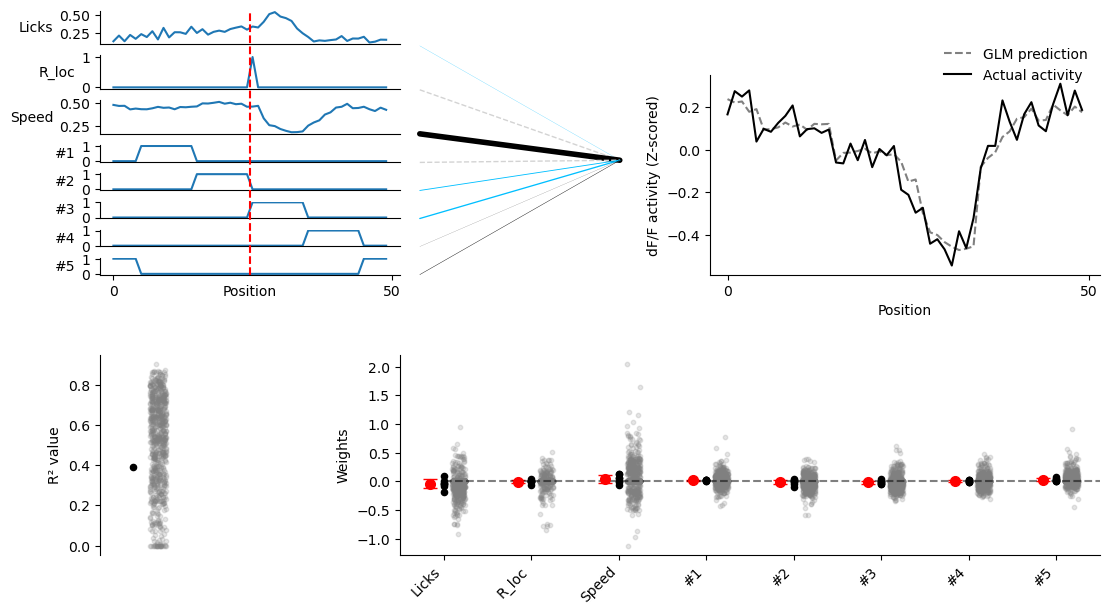

In [2]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

# filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='lasso')

animal='animal_2'
plot_example_neuron(animal, reorganized_data, GLM_params, variable_list, neuron='best', model_name=filepath.split('.')[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Best neuron: 31
R2: 0.09332792985681704
alpha: 1.0
pearson R2 overall: 0.06607091646390902
pearson R2 average: 0.8991807154154299


FileNotFoundError: [Errno 2] No such file or directory: 'figures/GLM_regression_EC_GLM_animal_2_31.png'

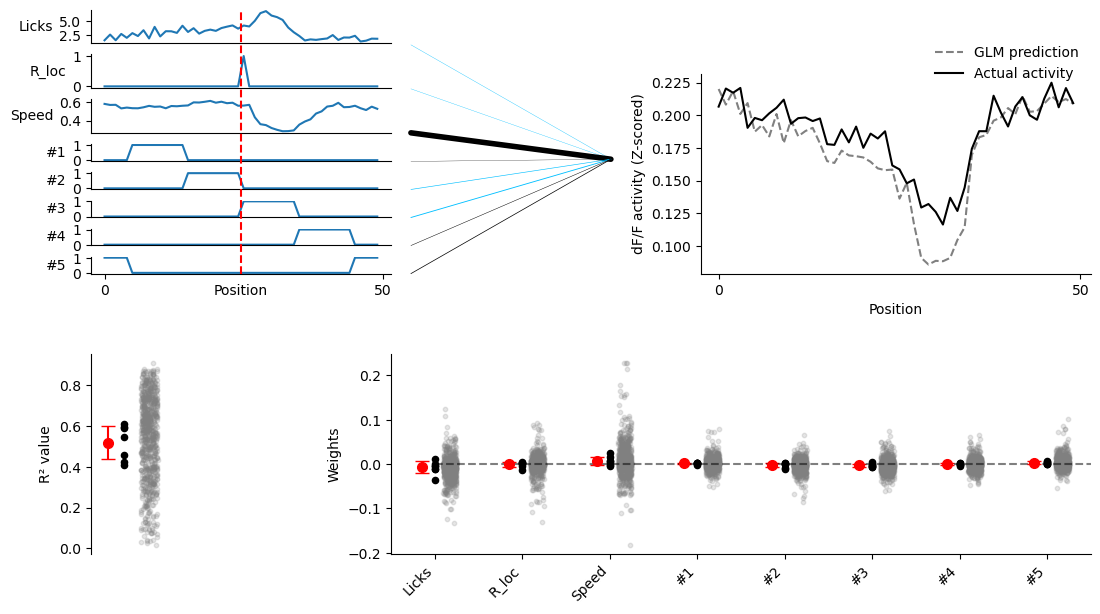

In [7]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

from GLM_regression_MF import *

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

# filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

animal='animal_2'
plot_example_neuron(animal, reorganized_data, GLM_params, variable_list, neuron='best', model_name=filepath.split('.')[0])

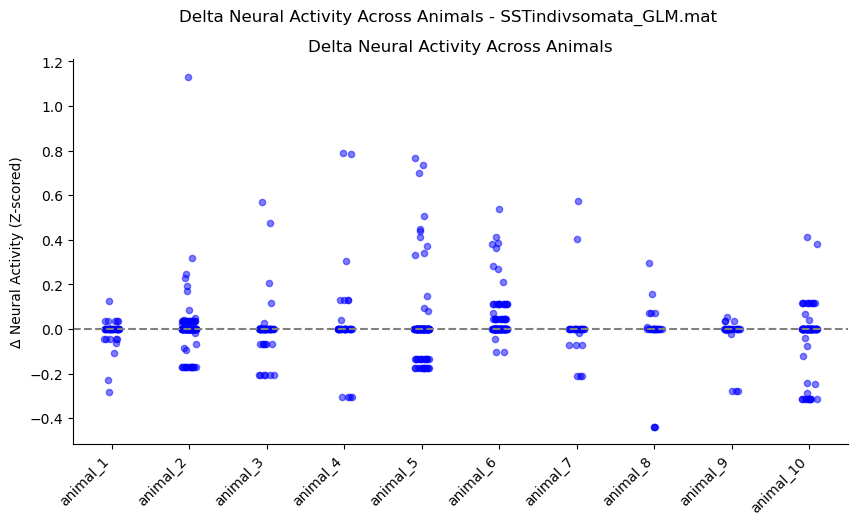

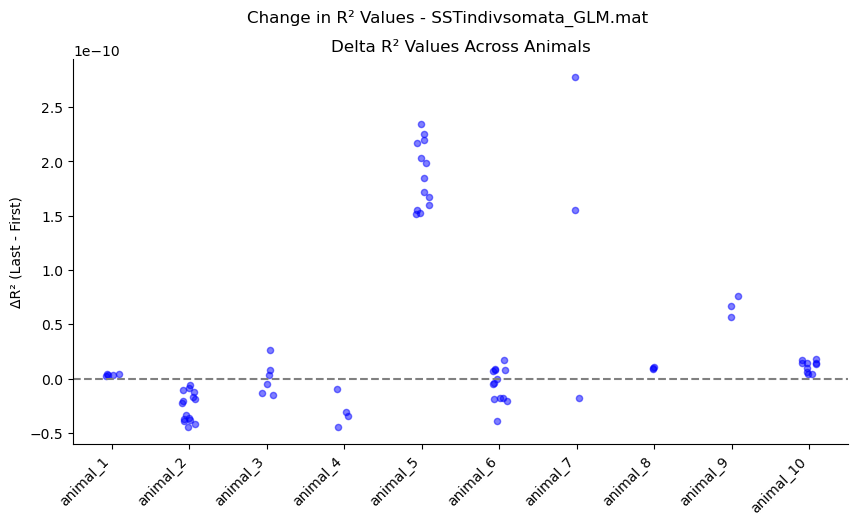

In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV


from GLM_regression_MF import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"


reorganized_data, variable_list = load_data(filepath)

activity_comparison = compare_neural_activity(reorganized_data)
fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'Delta Neural Activity Across Animals - {filepath}')
ax = fig.add_subplot(1, 1, 1)
plot_neural_activity_delta(activity_comparison, ax=ax)


GLM_params_comparison = fit_GLM_quintile_comparison(reorganized_data, regression='ridge')
fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'Change in R² Values - {filepath}')
ax = fig.add_subplot(1, 1, 1)
plot_R2_delta(GLM_params_comparison, ax=ax)



plt.show()




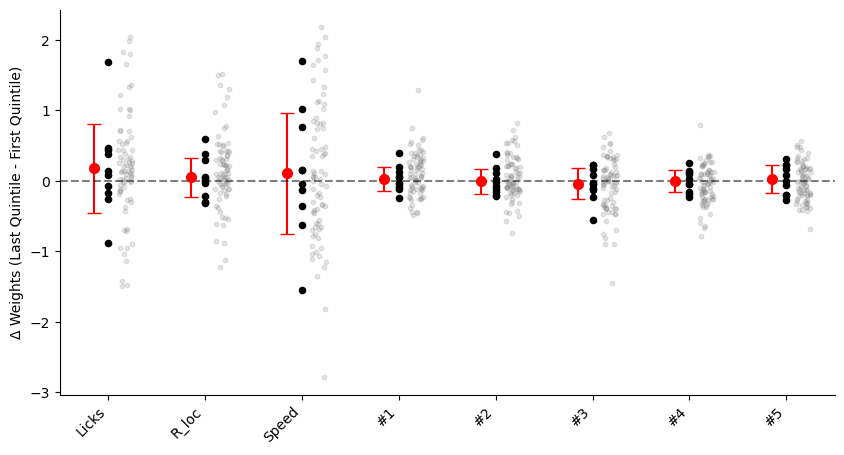

In [11]:
from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

delta_weights = {}


for animal in reorganized_data:
    delta_weights[animal] = []
    for i in range(len(GLM_params_first[animal])):
        weights_first = GLM_params_first[animal][i]['weights']
        weights_last = GLM_params_last[animal][i]['weights']
        
        delta = weights_last - weights_first
        delta_weights[animal].append(delta)

    
def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)

    animal_averages = []
    animal_stds = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)
        
        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        std_weights = np.std(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        animal_stds.append(std_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    animal_stds = np.array(animal_stds)

    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5,len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)



fig, ax = plt.subplots(figsize=(10, 5))
plot_delta_weights_summary(delta_weights, variable_list[1:], model_name='SSTindivsomata_GLM', ax=ax)
plt.show()


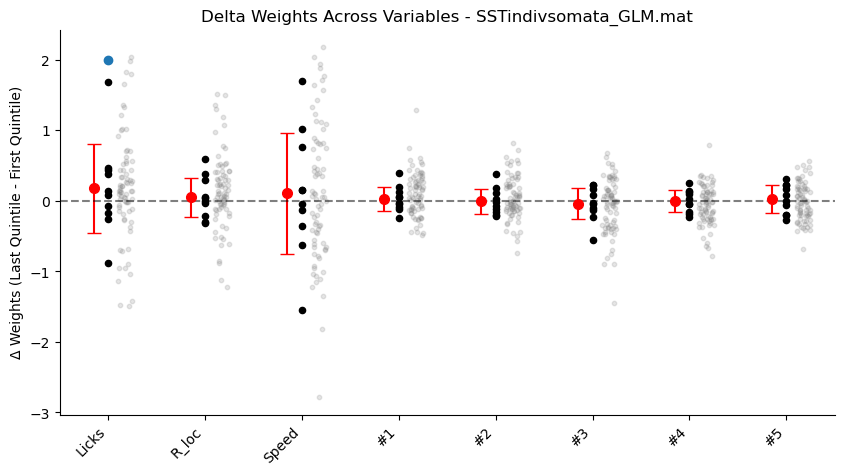

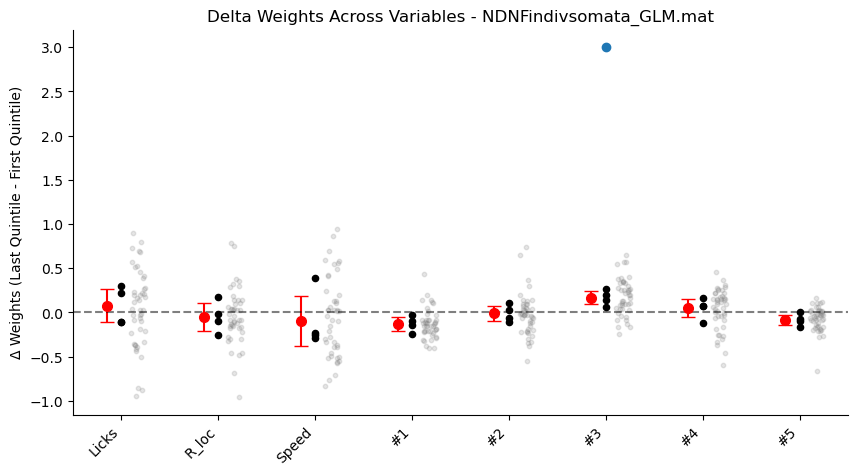

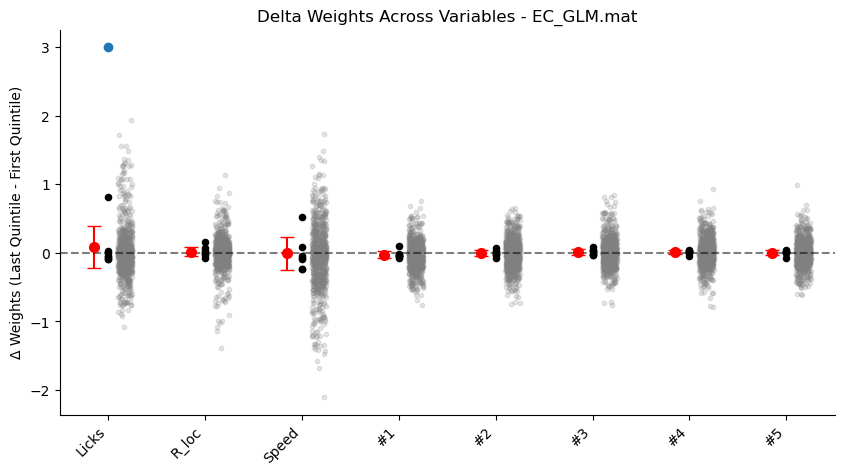

In [15]:
from GLM_regression import *

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})

# List of filepaths to loop through
filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
        if ax is None:
            fig, ax = plt.subplots(1,1)

        animal_averages = []
        animal_stds = []
        jitter = 0.25

        for animal_key in delta_weights:
            neuron_weights = []
            for neuron_nr in range(len(delta_weights[animal_key])):
                neuron_weights.append(delta_weights[animal_key][neuron_nr])
                jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
                ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

            neuron_weights = np.array(neuron_weights)
            mean_weights = np.mean(neuron_weights, axis=0)
            std_weights = np.std(neuron_weights, axis=0)
            animal_averages.append(mean_weights)
            animal_stds.append(std_weights)
            ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

        animal_averages = np.array(animal_averages)
        animal_stds = np.array(animal_stds)

        global_mean = np.mean(animal_averages, axis=0)
        global_std = np.std(animal_averages, axis=0)
        ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                    capsize=5, label='Average of all animals', markersize=7)

        absolute_distances = np.abs(global_mean)
        max_index = np.argmax(absolute_distances)
        second_max_index = np.argsort(absolute_distances)[-2]
        
        plt.scatter(max_index, second_max_index)
        
        ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
        ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
        ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
        ax.set_xlim([-0.5,len(variable_list)-0.5])

        if model_name is not None and save:
            fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)
    ax.set_title(f'Delta Weights Across Variables - {filepath}')
    plt.show()

    


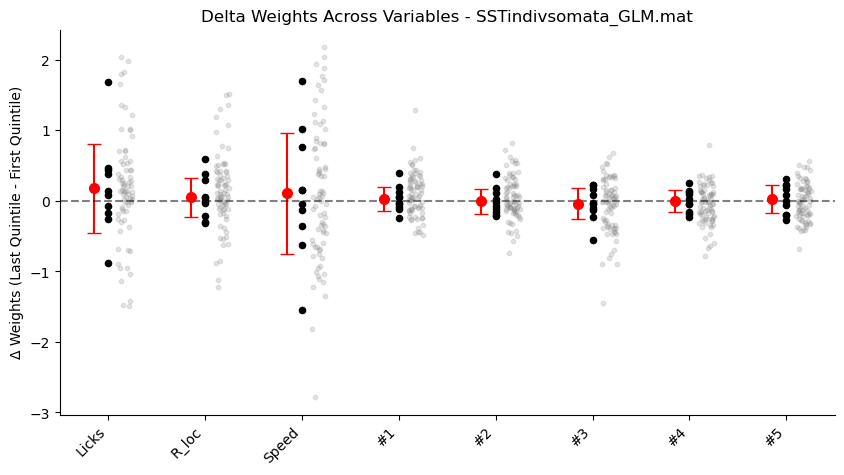

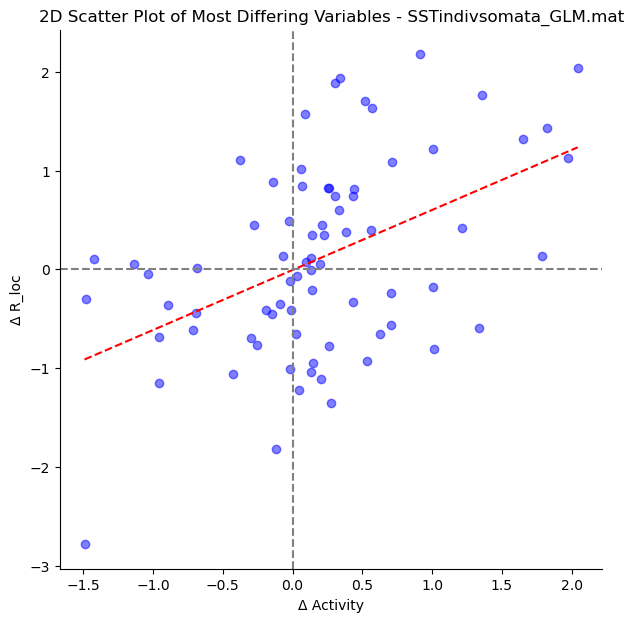

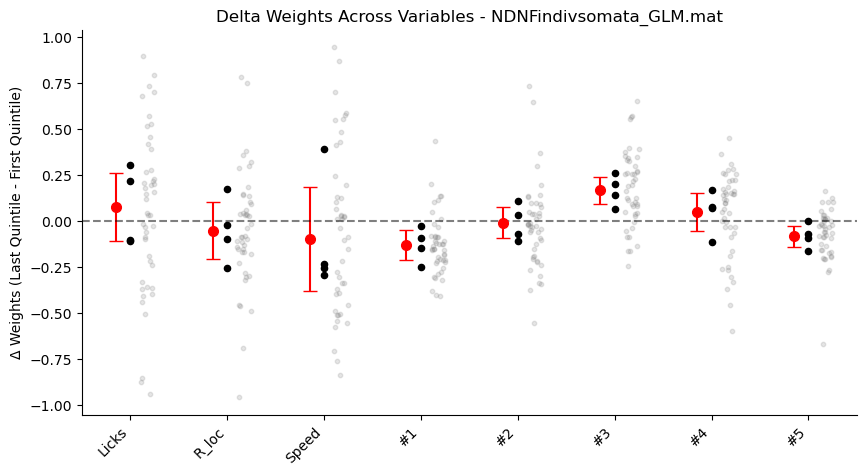

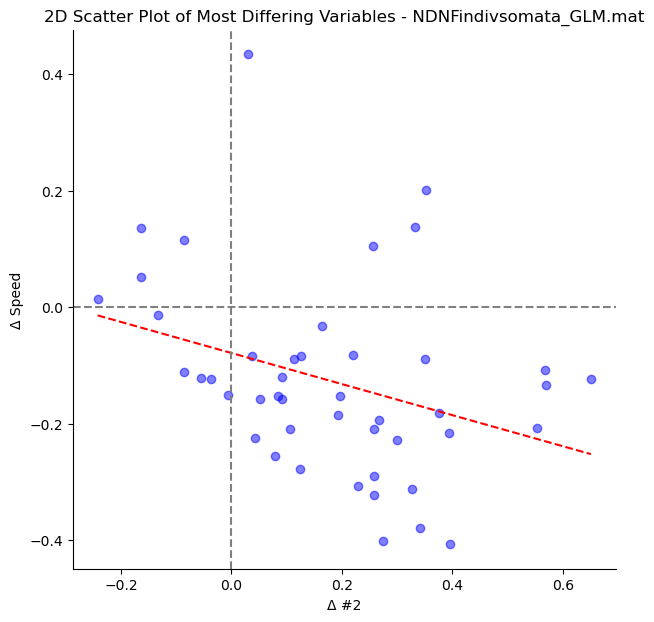

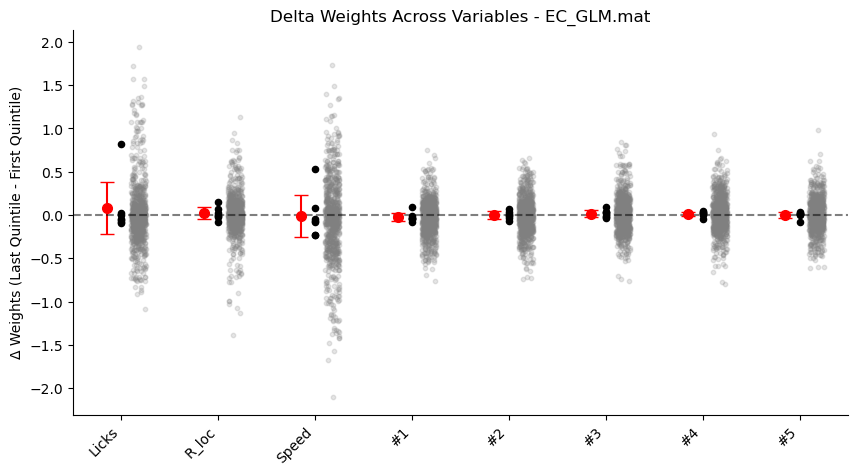

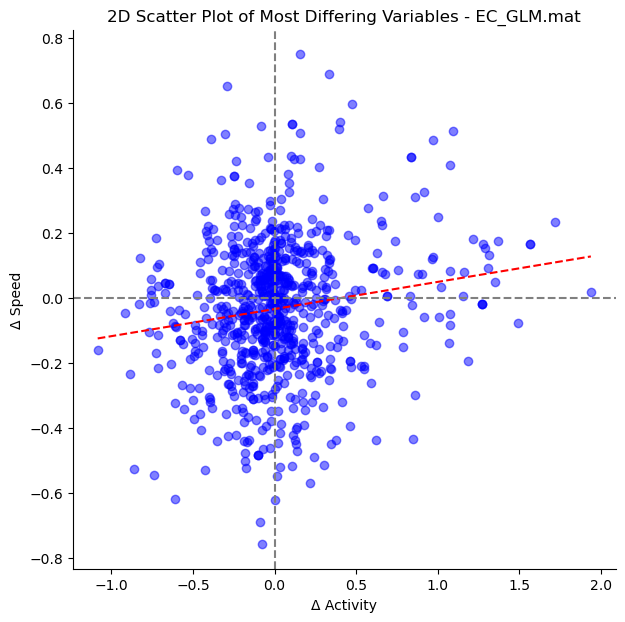

In [19]:
from GLM_regression import *
import numpy as np

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1)

    animal_averages = []
    animal_stds = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        std_weights = np.std(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        animal_stds.append(std_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    animal_stds = np.array(animal_stds)

    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5,len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index  # Return the indices of the two most differing variables

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)
    ax.set_title(f'Delta Weights Across Variables - {filepath}')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 7))
    all_x_values = []
    all_y_values = []
    
    for animal_key in delta_weights:
        for neuron_nr in range(len(delta_weights[animal_key])):
            x_value = delta_weights[animal_key][neuron_nr][max_index]
            y_value = delta_weights[animal_key][neuron_nr][second_max_index]
            ax.scatter(x_value, y_value, color='blue', alpha=0.5)
            all_x_values.append(x_value)
            all_y_values.append(y_value)

    if len(all_x_values) > 1:  
        coefficients = np.polyfit(all_x_values, all_y_values, 1)
        polynomial = np.poly1d(coefficients)
        x_fit = np.linspace(min(all_x_values), max(all_x_values), 100)
        y_fit = polynomial(x_fit)
        ax.plot(x_fit, y_fit, color='red', linestyle='--')
    
    ax.set_xlabel(f"Δ {variable_list[max_index]}")
    ax.set_ylabel(f"Δ {variable_list[second_max_index]}")
    ax.axhline(0, color='gray', linestyle='--')
    ax.axvline(0, color='gray', linestyle='--')
    ax.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')
    plt.show()



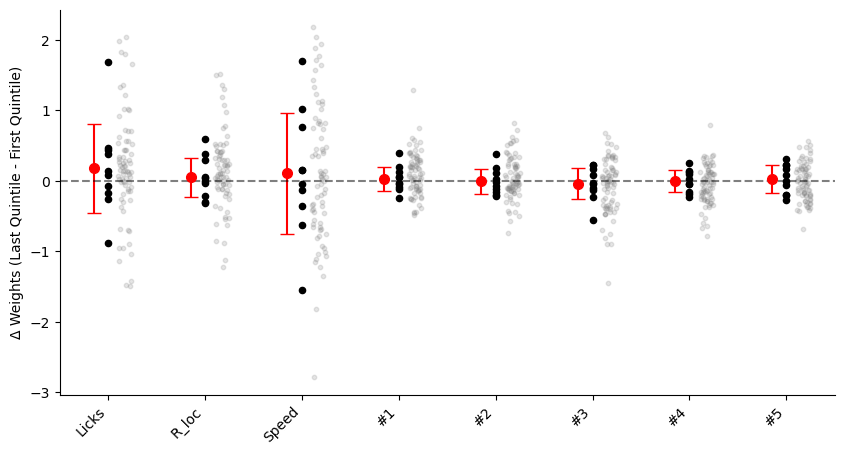

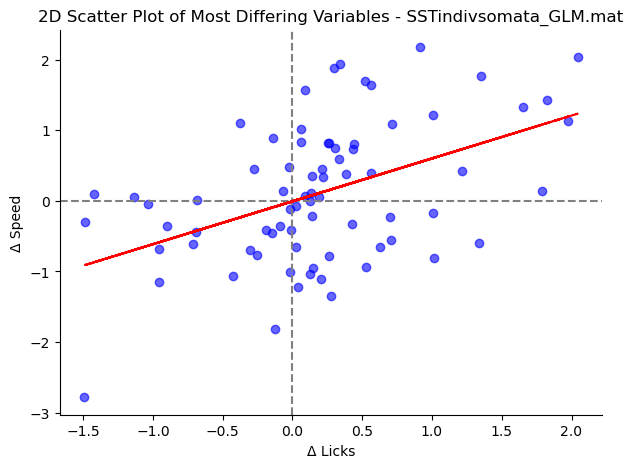

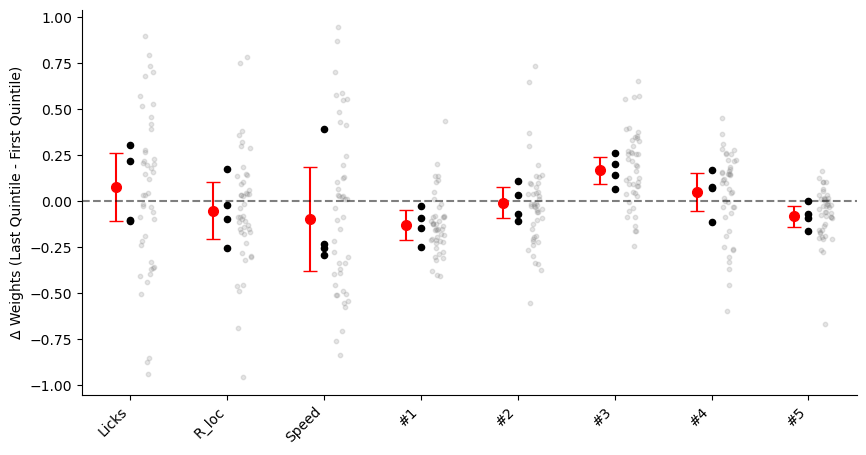

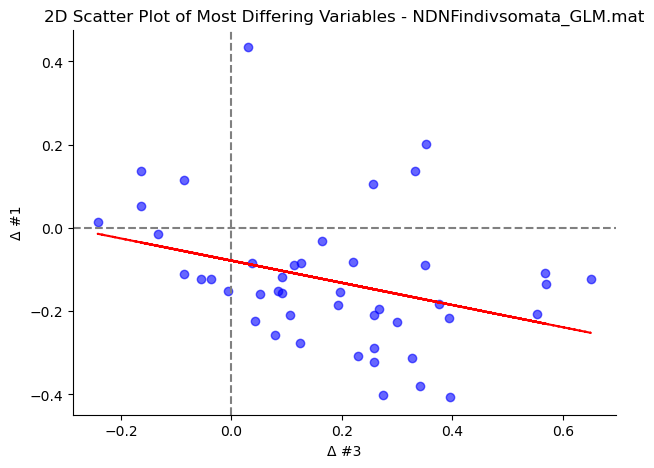

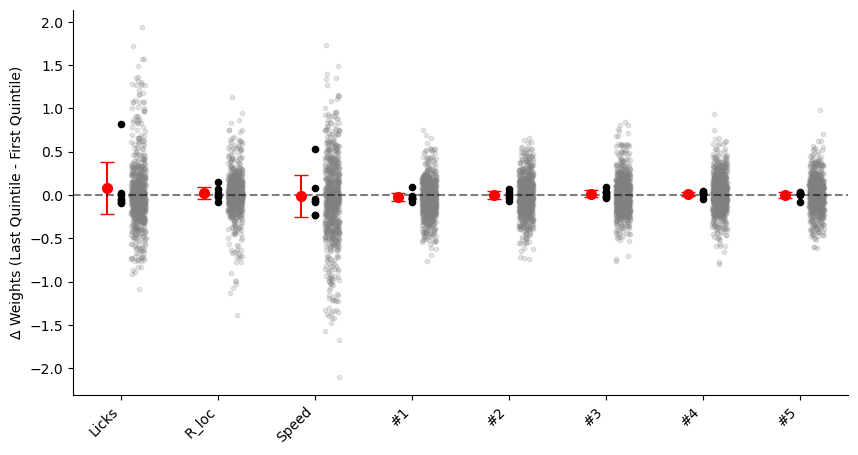

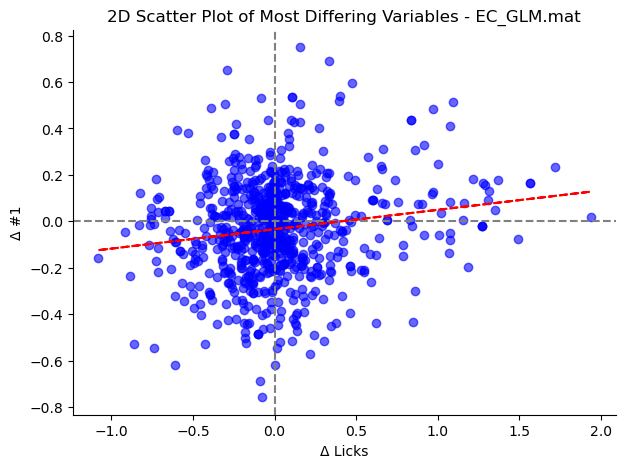

In [24]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    
    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

for filepath in filepath_list:
    reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset
    
    GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
    GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')
    
    delta_weights = {}
    
    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']
            
            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    # Plot and save the figure for the current dataset
    fig, ax = plt.subplots(figsize=(10, 5))
    max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

    # Prepare data for the 2D scatter plot of the most varying variables
    x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
    y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

    # Plot 2D scatter with best fit line
    fig, ax2 = plt.subplots(figsize=(7, 5))
    ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
    ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
    ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
    ax2.axhline(0, color='gray', linestyle='--')
    ax2.axvline(0, color='gray', linestyle='--')

    # Add line of best fit
    m, b = np.polyfit(x_data, y_data, 1)
    ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
    ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

    plt.show()



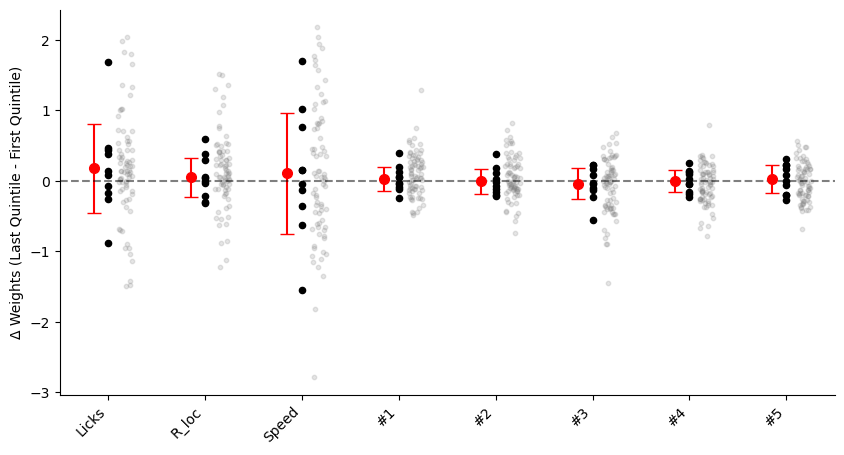

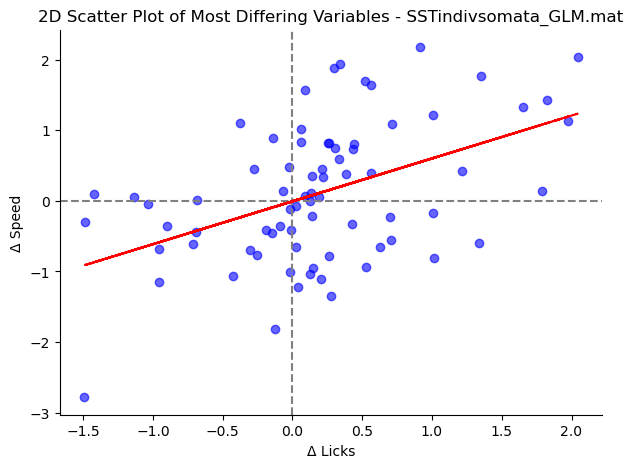

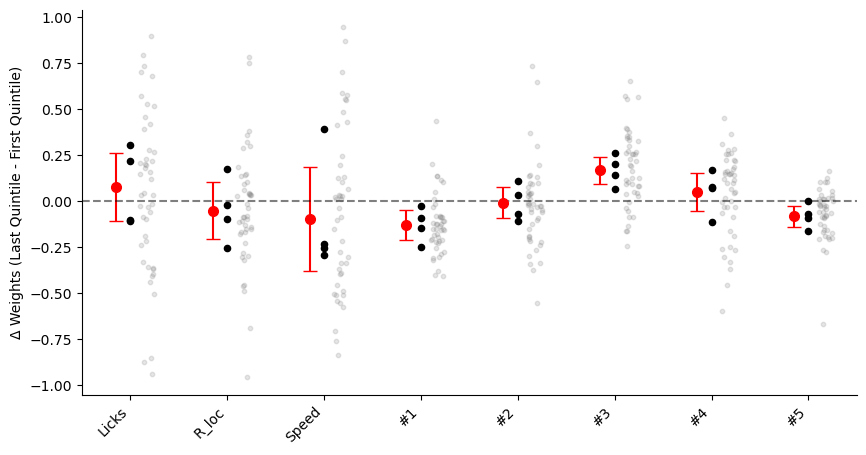

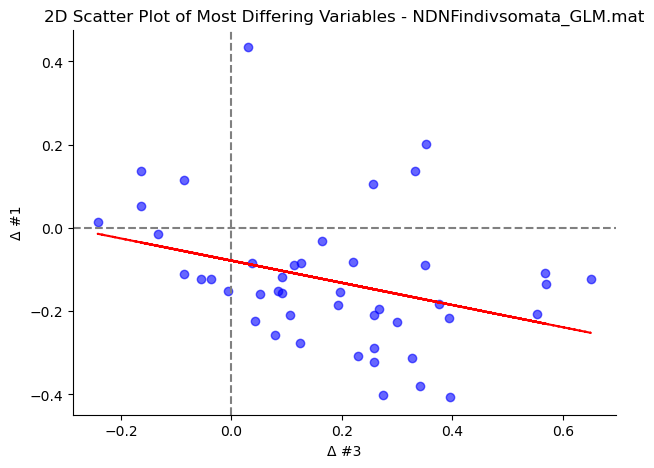

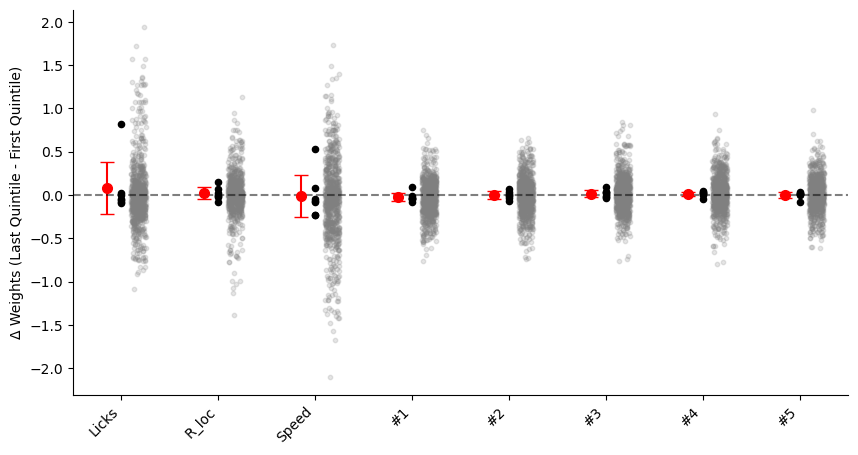

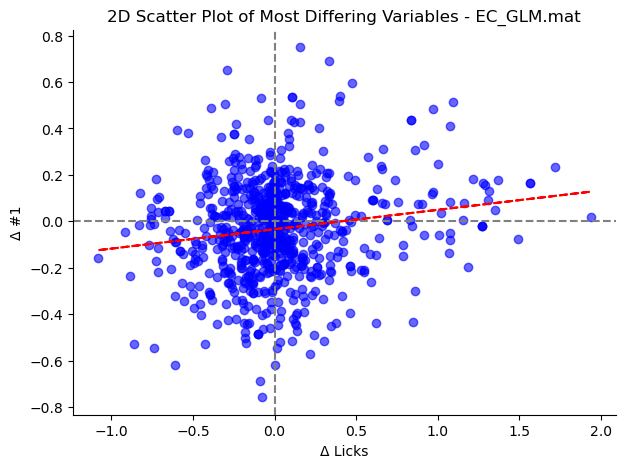

In [34]:
from GLM_regression import *
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10,
                     'axes.spines.right': False,
                     'axes.spines.top': False,
                     'legend.frameon': False})


filepath_list = ["SSTindivsomata_GLM.mat", "NDNFindivsomata_GLM.mat", "EC_GLM.mat"]

def calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last):
    delta_weights = {}

    for animal in reorganized_data:
        delta_weights[animal] = []
        for i in range(len(GLM_params_first[animal])):
            weights_first = GLM_params_first[animal][i]['weights']
            weights_last = GLM_params_last[animal][i]['weights']

            delta = weights_last - weights_first
            delta_weights[animal].append(delta)
    
    return delta_weights

def plot_delta_weights_summary(delta_weights, variable_list, model_name=None, save=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    animal_averages = []
    jitter = 0.25

    for animal_key in delta_weights:
        neuron_weights = []
        for neuron_nr in range(len(delta_weights[animal_key])):
            neuron_weights.append(delta_weights[animal_key][neuron_nr])
            jittered_x = np.arange(len(variable_list)) + np.random.uniform(0.1, jitter, len(variable_list))
            ax.scatter(jittered_x, delta_weights[animal_key][neuron_nr], color='grey', alpha=0.2, s=10)

        neuron_weights = np.array(neuron_weights)
        mean_weights = np.mean(neuron_weights, axis=0)
        animal_averages.append(mean_weights)
        ax.scatter(range(len(variable_list)), mean_weights, color='black', label=f'Animal {animal_key}', s=20)

    animal_averages = np.array(animal_averages)
    global_mean = np.mean(animal_averages, axis=0)
    global_std = np.std(animal_averages, axis=0)
    global_sem = global_std / np.sqrt(len(animal_averages))
    ax.errorbar(np.arange(len(variable_list))-0.15, global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
                capsize=5, label='Average of all animals', markersize=7)

    absolute_distances = np.abs(global_mean)
    max_index = np.argmax(absolute_distances)
    second_max_index = np.argsort(absolute_distances)[-2]

    ax.set_xticks(range(len(variable_list)), variable_list, rotation=45, ha='right')
    ax.set_ylabel('Δ Weights (Last Quintile - First Quintile)')
    ax.hlines(0, -0.5, len(variable_list)-0.5, linestyles='--', color='black', alpha=0.5)
    ax.set_xlim([-0.5, len(variable_list)-0.5])

    if model_name is not None and save:
        fig.savefig(f"{model_name}_delta_weights.png", dpi=300)

    return max_index, second_max_index

def get_delta_weights_and_plot(filepath_list):
    for filepath in filepath_list:
        reorganized_data, variable_list = load_data(filepath)  # Load data for each dataset

        GLM_params_first = fit_GLM(reorganized_data, quintile=1, regression='ridge')
        GLM_params_last = fit_GLM(reorganized_data, quintile=5, regression='ridge')

        delta_weights = calculate_delta_weights(reorganized_data, GLM_params_first, GLM_params_last)

        # Plot and save the figure for the current dataset
        fig, ax = plt.subplots(figsize=(10, 5))
        max_index, second_max_index = plot_delta_weights_summary(delta_weights, variable_list[1:], model_name=filepath.split('.')[0], ax=ax)

        # Prepare data for the 2D scatter plot of the most varying variables
        x_data = np.concatenate([np.array(delta_weights[animal])[:, max_index] for animal in delta_weights])
        y_data = np.concatenate([np.array(delta_weights[animal])[:, second_max_index] for animal in delta_weights])

        # Plot 2D scatter with best fit line
        fig, ax2 = plt.subplots(figsize=(7, 5))
        ax2.scatter(x_data, y_data, color='blue', alpha=0.6)
        ax2.set_xlabel(f"Δ {variable_list[1:][max_index]}")
        ax2.set_ylabel(f"Δ {variable_list[1:][second_max_index]}")
        ax2.axhline(0, color='gray', linestyle='--')
        ax2.axvline(0, color='gray', linestyle='--')

        # Add line of best fit
        m, b = np.polyfit(x_data, y_data, 1)
        ax2.plot(x_data, m*x_data + b, color='red', linestyle='--')
        ax2.set_title(f'2D Scatter Plot of Most Differing Variables - {filepath}')

        plt.show()

# Call the function to execute the workflow
get_delta_weights_and_plot(filepath_list)
